In [1]:
# libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.stats.power as smp
import scipy

In [21]:
# specific functions

def format_func_0f(value, tick_number):
    return f'${value:.0f}$'

def ape(target, pred):
    num = pred - target
    return np.abs(num / target)

def plot_boxplot(values, subplot_letter, color, hatch, position, legend):
    output_boxplot = ax_dict[subplot_letter].boxplot(values, 
                                   positions=[position],
                                   whis=whiskers,
                                   patch_artist=patch_artist,
                                   medianprops=medianprops,
                                   flierprops=flierprops,
                                   whiskerprops=whiskerprops,
                                   capprops=capprops,
                                   showfliers=showfliers,
                                   widths=width
                                   )

    for index, bplot in enumerate(output_boxplot['boxes']):
        bplot.set_label(legend)
        bplot.set_facecolor(color)
        bplot.set(hatch=hatch, linewidth=3)

def plot_stat_signif(subplot_letter, sig_symbol, x1, x2, bar_spacing=0.004):
    plt.rcParams['text.usetex'] = False
    y_bottom, y_top = ax_dict[subplot_letter].get_ylim()
    y_range = y_top - y_bottom

    y_starting_pos = 1.01 * y_top
    y_margin = 0.0125 * y_range
    
    bar_height, bar_tips = y_starting_pos + bar_spacing, y_starting_pos - y_margin + bar_spacing
    text_height = bar_height 

    ax_dict[subplot_letter].plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=3, c='k')

    ax_dict[subplot_letter].text((x1 + x2) * 0.5,
                      text_height,
                      sig_symbol,
                      ha='center',
                      va='bottom',
                      c='k',
                      fontsize=0.9*LABEL_SIZE/2)    

In [3]:
df_MAV = pd.read_csv('../outputs/files/ww_estimator/df_MAV_final.csv', sep=";")
df_SEV = pd.read_csv('../outputs/files/ww_estimator/df_SEV_final.csv', sep=";")
df_SEC = pd.read_csv('../outputs/files/ww_estimator/df_SEC_final.csv', sep=";")

for df in [df_MAV, df_SEV, df_SEC]:
    df.dateStart = pd.to_datetime(df.dateStart)

In [4]:
ground_truth_file_MAV = pd.read_csv('../outputs/files/census_pop/MAV_GT_manuscript.csv', sep=";")
ground_truth_file_SEV = pd.read_csv('../outputs/files/census_pop/SEV_GT_manuscript.csv', sep=";")

for gt_file in [ground_truth_file_MAV, ground_truth_file_SEV]:
    gt_file.dateStart = pd.to_datetime(gt_file.dateStart)
    gt_file.rename(columns={'final_population':'Nt'}, inplace=True)

In [5]:
df_MAV.loc[df_MAV.dateStart.isin(ground_truth_file_MAV.dateStart), 'GT_pop'] = ground_truth_file_MAV.Nt.values
df_SEV.loc[df_SEV.dateStart.isin(ground_truth_file_SEV.dateStart), 'GT_pop'] = ground_truth_file_SEV.Nt.values

In [6]:
y_ww_mav = df_MAV.loc[~df_MAV.GT_pop.isna()].Nt_hat_4.values
y_insee_mav = df_MAV.loc[~df_MAV.GT_pop.isna()].GT_pop.values

y_ww_sev = df_SEV.loc[~df_SEV.GT_pop.isna()].Nt_hat_4.values
y_insee_sev = df_SEV.loc[~df_SEV.GT_pop.isna()].GT_pop.values

In [7]:
df_been_MAV = pd.read_csv('../outputs/files/ww_estimator/df_been_MAV.csv', sep=";")
df_vn_MAV = pd.read_csv('../outputs/files/ww_estimator/df_vn_MAV.csv', sep=";")
df_zheng_MAV = pd.read_csv('../outputs/files/ww_estimator/df_zheng_MAV.csv', sep=";")

for df in [df_been_MAV, df_vn_MAV, df_zheng_MAV]:
    df.dateStart = pd.to_datetime(df.dateStart)
    df.loc[df.dateStart.isin(ground_truth_file_MAV.dateStart), 'GT_pop'] = ground_truth_file_MAV.Nt.values

In [8]:
df_been_SEV = pd.read_csv('../outputs/files/ww_estimator/df_been_SEV.csv', sep=";")
df_vn_SEV = pd.read_csv('../outputs/files/ww_estimator/df_vn_SEV.csv', sep=";")
df_zheng_SEV = pd.read_csv('../outputs/files/ww_estimator/df_zheng_SEV.csv', sep=";")

for df in [df_been_SEV, df_vn_SEV, df_zheng_SEV]:
    df.dateStart = pd.to_datetime(df.dateStart)
    df.loc[df.dateStart.isin(ground_truth_file_SEV.dateStart), 'GT_pop'] = ground_truth_file_SEV.Nt.values

In [9]:
y_been_mav = df_been_MAV.loc[~df_been_MAV.GT_pop.isna()].Nt_hat_4.values
y_insee_mav_1 = df_MAV.loc[~df_MAV.GT_pop.isna()].GT_pop.values

y_been_sev = df_been_SEV.loc[~df_been_SEV.GT_pop.isna()].Nt_hat_4.values
y_insee_sev = df_SEV.loc[~df_SEV.GT_pop.isna()].GT_pop.values

y_vn_mav = df_vn_MAV.loc[~df_vn_MAV.GT_pop.isna()].Nt_hat_4.values
y_insee_mav = df_MAV.loc[~df_MAV.GT_pop.isna()].GT_pop.values

y_vn_sev = df_vn_SEV.loc[~df_vn_SEV.GT_pop.isna()].Nt_hat_4.values
y_insee_sev = df_SEV.loc[~df_SEV.GT_pop.isna()].GT_pop.values

y_zheng_mav = df_zheng_MAV.loc[~df_zheng_MAV.GT_pop.isna()].Nt_hat_4.values
y_insee_mav = df_MAV.loc[~df_MAV.GT_pop.isna()].GT_pop.values

y_zheng_sev = df_zheng_SEV.loc[~df_zheng_SEV.GT_pop.isna()].Nt_hat_4.values
y_insee_sev = df_SEV.loc[~df_SEV.GT_pop.isna()].GT_pop.values

In [10]:
ape_mav = ape(y_insee_mav, y_ww_mav)
ape_sev = ape(y_insee_sev, y_ww_sev)

ape_mav_been = ape(y_insee_mav, y_been_mav)
ape_sev_been = ape(y_insee_sev, y_been_sev)

ape_mav_vn = ape(y_insee_mav, y_vn_mav)
ape_sev_vn = ape(y_insee_sev, y_vn_sev)

ape_mav_zheng = ape(y_insee_mav, y_zheng_mav)
ape_sev_zheng = ape(y_insee_sev, y_zheng_sev)

In [11]:
flierprops = dict(marker='o', markerfacecolor='dimgray', markersize=12, markeredgecolor='black')
whiskerprops = dict(linestyle='-',linewidth=3, color='black')
capprops = dict(linestyle='-',linewidth=3, color='black')
medianprops = dict(linewidth=2.5, color='black')
whiskers = (2.5,97.5)
patch_artist = True
showfliers=True
width = np.array([.15])
box_labels = ['MA', 'SV']
y_label = 'Absolute percentage error (\%)'
digit_y_label = FuncFormatter(format_func_0f)

# Background and grid styles :
background_facecolor = '0.9'
grid_color = 'black'#'white'
grid_linewidth = 1.5
grid_linestyle = '-'

In [12]:
# lockdowns periods:
fl_sd, fl_ed = pd.to_datetime('2020-03-17'), pd.to_datetime('2020-05-10')
sl_sd, sl_ed = pd.to_datetime('2020-10-30'), pd.to_datetime('2020-12-14')

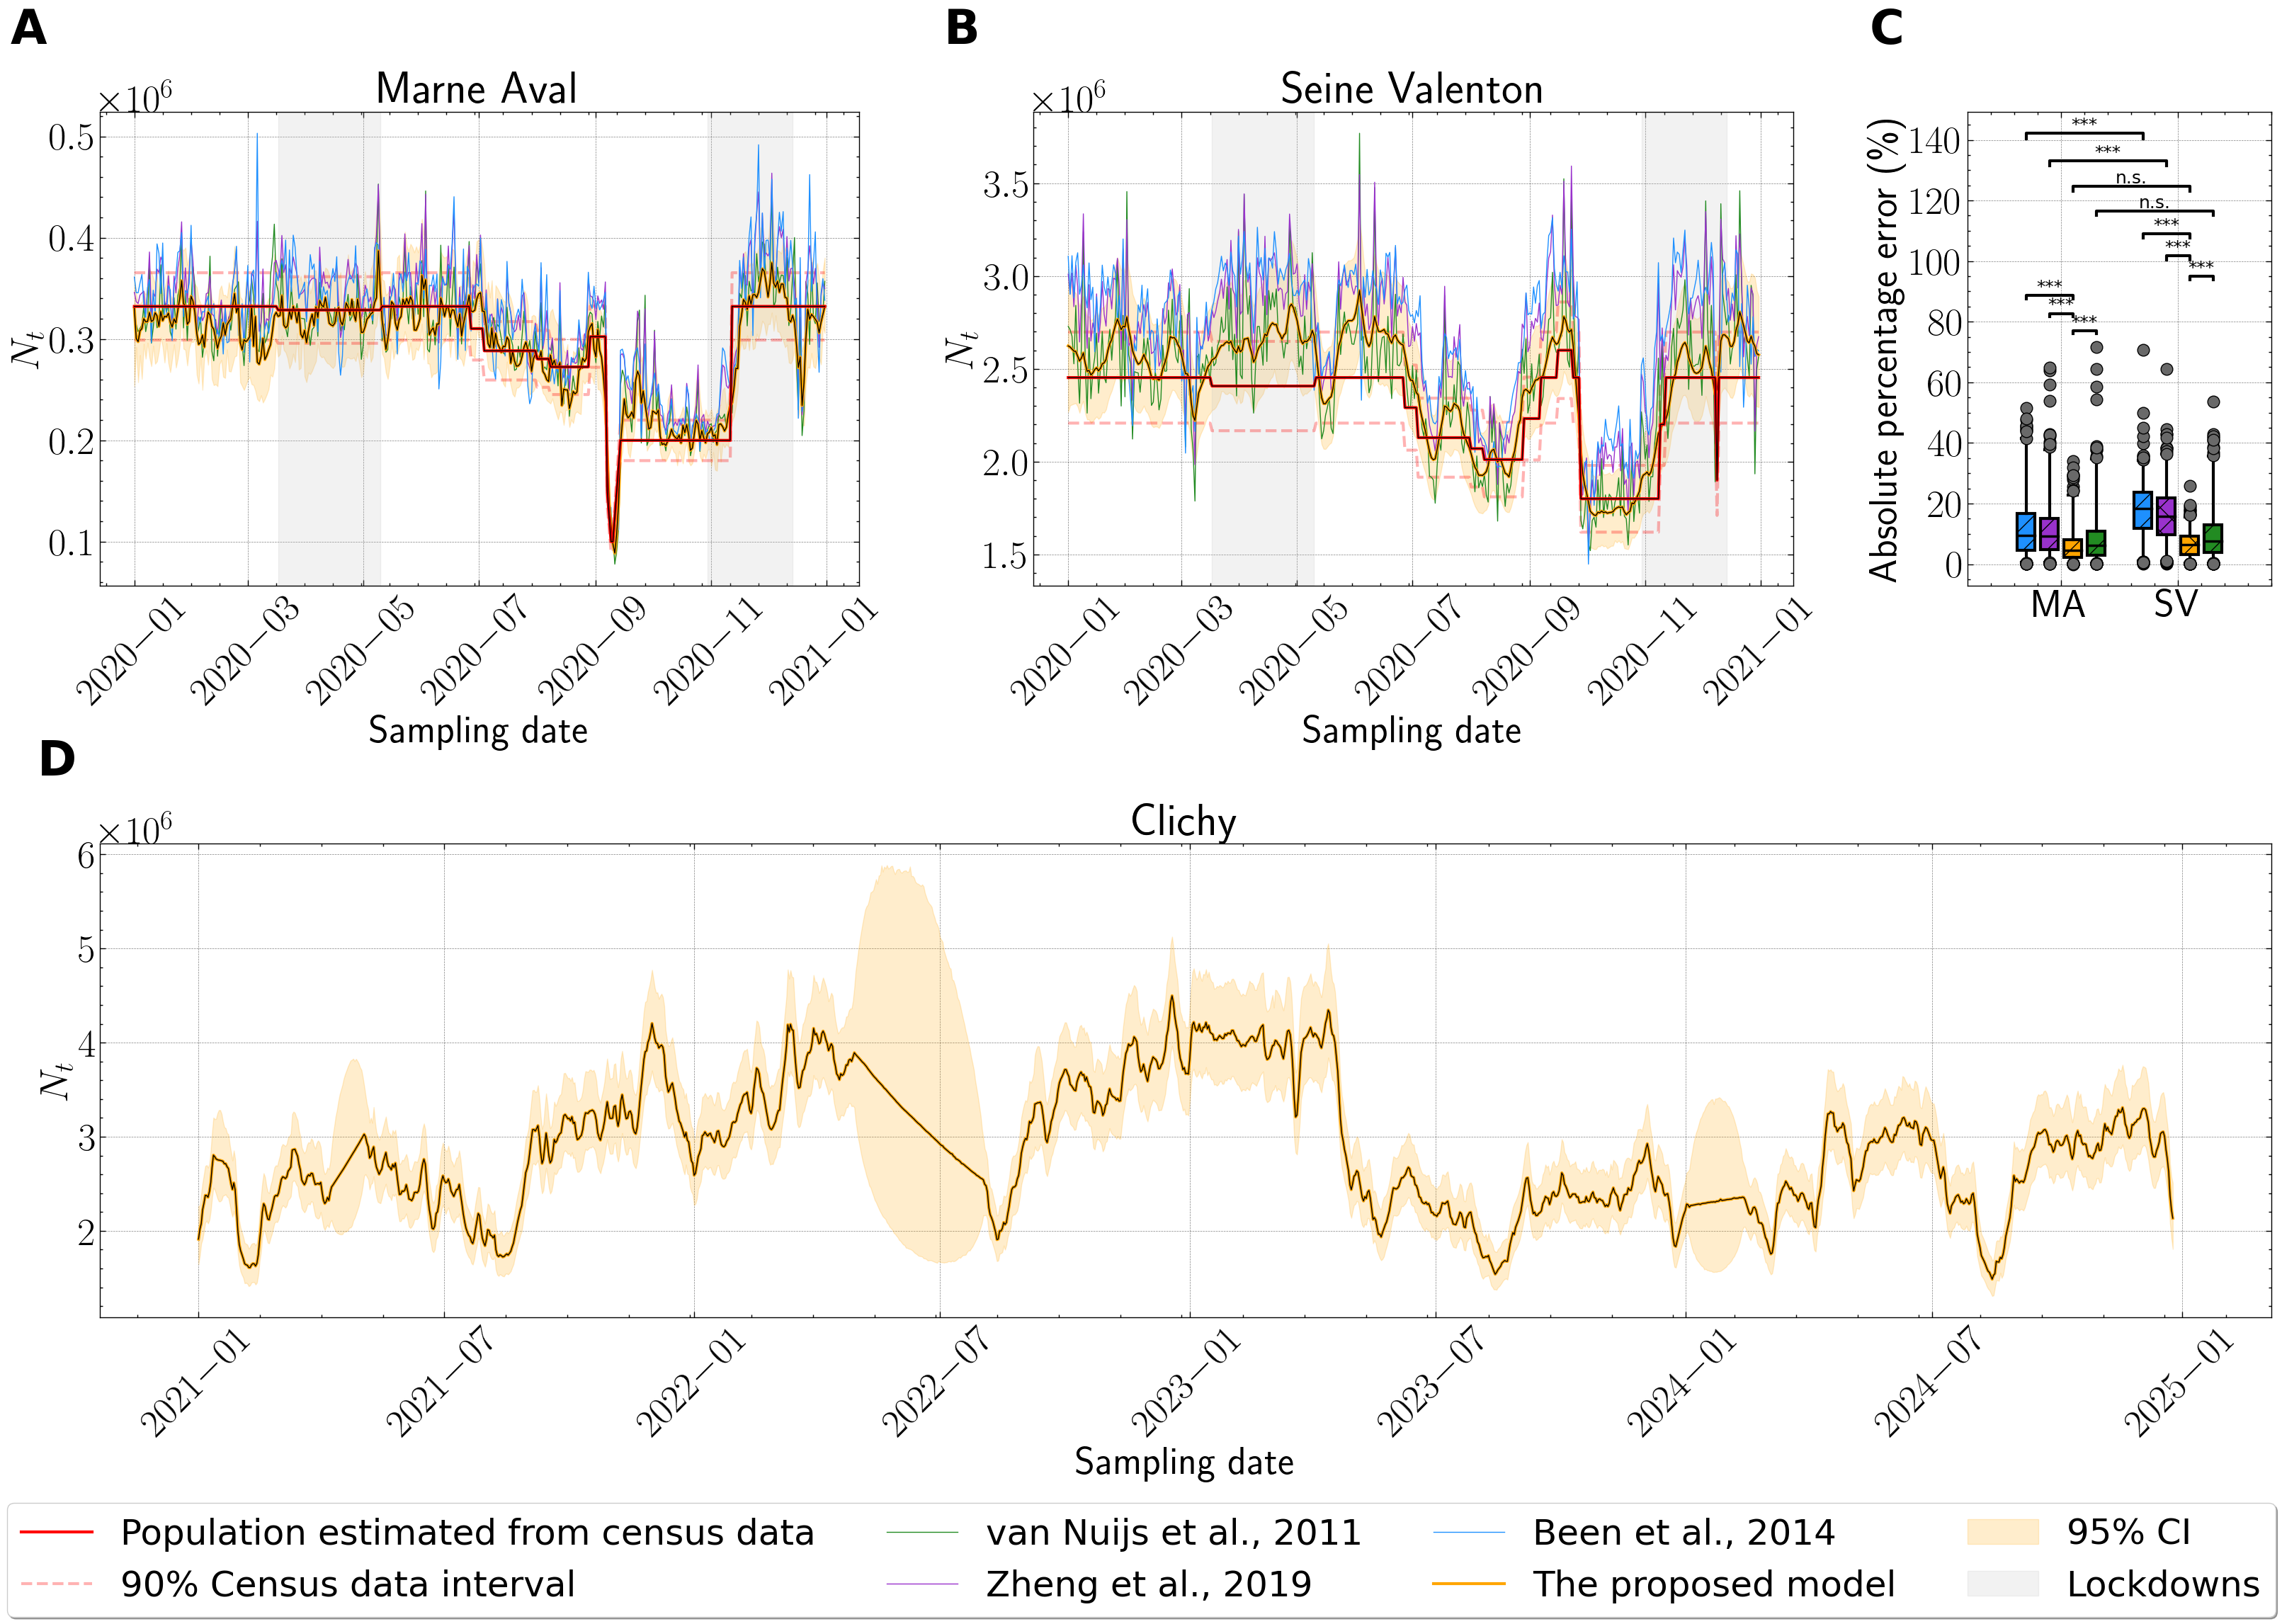

In [22]:
smoothed_width = 3
black_width = 1
smoothed_width_biblio = 1

with plt.style.context(['science', 'notebook', 'grid']):

    KEY_SIZE = 48
    LABEL_SIZE = 40
    TICK_SIZE = 40
    TITLE_SIZE = 46
    LEGEND_SIZE = 36
    DATES_SIZE = 18
    figsize = (32, 20) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        AABBC
        DDDDD
        """,
        gridspec_kw={'wspace': 0.05, 'hspace':0.075}
    )
    ################################ ------------------------------ A ------------------------------ ################################
    GT_mav = ax_dict['A'].plot(df_MAV.dateStart.values, df_MAV.GT_pop.values, label='Population estimated from census data', color='red', linewidth=smoothed_width, zorder=3)
    ax_dict['A'].plot(df_MAV.dateStart.values, df_MAV.GT_pop.values, color='black', linewidth=black_width, zorder=3)
    
    ax_dict['A'].plot(df_MAV.dateStart.values, 1.1*df_MAV.GT_pop.values, linestyle='--', color='red', label='90% Census data interval', linewidth=smoothed_width, alpha=0.3)
    ax_dict['A'].plot(df_MAV.dateStart.values, 0.9*df_MAV.GT_pop.values, linestyle='--', color='red', linewidth=smoothed_width, alpha=0.3)
        
    ax_dict['A'].plot(df_vn_MAV.dateStart.values, df_vn_MAV.Nt_hat_4.values, label='van Nuijs et al., 2011', color='forestgreen', linewidth=smoothed_width_biblio)
    ax_dict['A'].plot(df_zheng_MAV.dateStart.values, df_zheng_MAV.Nt_hat_4.values, label='Zheng et al., 2019', color='darkorchid', linewidth=smoothed_width_biblio)
    ax_dict['A'].plot(df_been_MAV.dateStart.values, df_been_MAV.Nt_hat_4.values, label='Been et al., 2014', color='dodgerblue', linewidth=smoothed_width_biblio)
    
    smoothed_1 = ax_dict['A'].plot(df_MAV.dateStart.values, df_MAV.Nt_hat_4.values, label='The proposed model', color='orange', linewidth=smoothed_width)
    ax_dict['A'].plot(df_MAV.dateStart.values, df_MAV.Nt_hat_4.values, color='black', linewidth=black_width)
    
    CIS_1 = ax_dict['A'].fill_between(df_MAV.dateStart.values, 
                        df_MAV.Nt_hat_4_CIL.values,
                        df_MAV.Nt_hat_4_CIU.values, alpha=.2, color='orange', label='95% CI')


    ax_dict['A'].axvspan(fl_sd, fl_ed, alpha=0.2, color='silver', label='Lockdowns')
    ax_dict['A'].axvspan(sl_sd, sl_ed, alpha=0.2, color='silver')
    
    ax_dict['A'].set_title('Marne Aval', size=TITLE_SIZE)
    ax_dict['A'].set_ylabel("$N_t$")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE, rotation=45)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].ticklabel_format(style='sci', axis='y', scilimits=(6,6))

    ################################ ------------------------------ B ------------------------------ ################################
    GT_sev = ax_dict['B'].plot(df_SEV.dateStart.values, df_SEV.GT_pop.values, label='Population estimated from census data', color='red', linewidth=smoothed_width, zorder=3)
    ax_dict['B'].plot(df_SEV.dateStart.values, df_SEV.GT_pop.values, color='black', linewidth=black_width, zorder=3)
    
    ax_dict['B'].plot(df_SEV.dateStart.values, 1.1*df_SEV.GT_pop.values, linestyle='--', color='red', linewidth=smoothed_width, alpha=0.3)
    ax_dict['B'].plot(df_SEV.dateStart.values, 0.9*df_SEV.GT_pop.values, linestyle='--', color='red', linewidth=smoothed_width, alpha=0.3)
        
    ax_dict['B'].plot(df_vn_SEV.dateStart.values, df_vn_SEV.Nt_hat_4.values, label='van Nuijs et al., 2011', color='forestgreen', linewidth=smoothed_width_biblio)
    ax_dict['B'].plot(df_zheng_SEV.dateStart.values, df_zheng_SEV.Nt_hat_4.values, label='Zheng et al., 2019', color='darkorchid', linewidth=smoothed_width_biblio)
    ax_dict['B'].plot(df_been_SEV.dateStart.values, df_been_SEV.Nt_hat_4.values, label='Been et al., 2024', color='dodgerblue', linewidth=smoothed_width_biblio)
    
    smoothed_2 = ax_dict['B'].plot(df_SEV.dateStart.values, df_SEV.Nt_hat_4.values, label='The proposed model', color='orange', linewidth=smoothed_width)
    ax_dict['B'].plot(df_SEV.dateStart.values, df_SEV.Nt_hat_4.values, color='black', linewidth=black_width)
    
    CIS_2 = ax_dict['B'].fill_between(df_SEV.dateStart.values, 
                        df_SEV.Nt_hat_4_CIL.values,
                        df_SEV.Nt_hat_4_CIU.values, alpha=.2, color='orange', label='95% CI')

    ax_dict['B'].axvspan(fl_sd, fl_ed, alpha=0.2, color='silver')
    ax_dict['B'].axvspan(sl_sd, sl_ed, alpha=0.2, color='silver')

    ax_dict['B'].set_title('Seine Valenton', size=TITLE_SIZE)
    ax_dict['B'].set_ylabel("$N_t$")
    ax_dict['B'].set_xlabel("Sampling date")
    ax_dict['B'].tick_params(axis='x', labelsize=TICK_SIZE, rotation=45)
    ax_dict['B'].tick_params(axis='y', labelsize=TICK_SIZE)

    ################################ ------------------------------ C ------------------------------ ################################    
    plot_boxplot(100*ape_mav, 'C', color='orange', hatch='/', position=0.1, legend='Marne Aval')
    plot_boxplot(100*ape_mav_zheng, 'C', color='darkorchid', hatch='/', position=-0.1, legend='Marne Aval')
    plot_boxplot(100*ape_mav_been, 'C', color='dodgerblue', hatch='/', position=-0.3, legend='Marne Aval')
    plot_boxplot(100*ape_mav_vn, 'C', color='forestgreen', hatch='/', position=0.3, legend='Marne Aval')

    plot_boxplot(100*ape_sev, 'C', color='orange', hatch='X', position=1+0.1, legend='Seine Valenton')
    plot_boxplot(100*ape_sev_zheng, 'C', color='darkorchid', hatch='X', position=1-0.1, legend='Seine Valenton')
    plot_boxplot(100*ape_sev_been, 'C', color='dodgerblue', hatch='/', position=1-0.3, legend='Seine Valenton')
    plot_boxplot(100*ape_sev_vn, 'C', color='forestgreen', hatch='/', position=1+0.3, legend='Seine Valenton')

    ### Statistical significance
    bar_spacing = 1 #0.004
    plot_stat_signif('C', '***', 0.1, 0.3, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', 0.1, -0.1, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', -0.3, 0.1, bar_spacing=bar_spacing)
    
    plot_stat_signif('C', '***', 1+0.1, 1+0.3, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', 1+0.1, 1-0.1, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', 1-0.3, 1+0.1, bar_spacing=bar_spacing)

    plot_stat_signif('C', 'n.s.', 0.3, 1+0.3, bar_spacing=bar_spacing)
    plot_stat_signif('C', 'n.s.', 0.1, 1+0.1, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', -0.1, 1-0.1, bar_spacing=bar_spacing)
    plot_stat_signif('C', '***', -0.3, 1-0.3, bar_spacing=bar_spacing)
    
    # Specifying xlabels:
    plt.rcParams['text.usetex'] = True
    ax_dict['C'].set_xticks(np.arange(len(box_labels)))
    ax_dict['C'].set_xticklabels(box_labels, size=LABEL_SIZE)

    # Specifying ylabels:
    ax_dict['C'].set_ylabel(y_label)

    # Background and grid formatting:
    #ax_dict['C'].set_facecolor(background_facecolor)
    #ax_dict['C'].grid(color=grid_color,
    #                 linewidth=grid_linewidth,
    #                 linestyle=grid_linestyle)

    # Specifying y axis float definition:
    ax_dict['C'].yaxis.set_major_formatter(digit_y_label)

    ################################ ------------------------------ D ------------------------------ ################################ 
    smoothed_3 = ax_dict['D'].plot(df_SEC.dateStart.values, df_SEC.Nt_hat_4.values, label='The proposed model', color='orange', linewidth=smoothed_width)
    ax_dict['D'].plot(df_SEC.dateStart.values, df_SEC.Nt_hat_4.values, color='black', linewidth=black_width)
    
    CIS_3 = ax_dict['D'].fill_between(df_SEC.dateStart.values, 
                        df_SEC.Nt_hat_4_CIL.values,
                        df_SEC.Nt_hat_4_CIU.values, alpha=.2, color='orange', label='95% CI')


    ax_dict['D'].set_title('Clichy', size=TITLE_SIZE)
    ax_dict['D'].set_ylabel("$N_t$")
    ax_dict['D'].set_xlabel("Sampling date")
    ax_dict['D'].tick_params(axis='x', labelsize=TICK_SIZE, rotation=45)
    ax_dict['D'].tick_params(axis='y', labelsize=TICK_SIZE)


    # Display subplot keys
    plt.rcParams['text.usetex'] = False
    fig.canvas.draw()

    # Function to align text with the ylabel of a specific axis
    def align_text_with_ylabel(ax, text, fig):
        ylabel = ax.yaxis.label
        bbox = ylabel.get_window_extent()
        bbox_fig = fig.transFigure.inverted().transform(bbox)
        ylabel_center_fig_x = (bbox_fig[0, 0] + bbox_fig[1, 0]) / 2
        ylabel_center_fig_y = (bbox_fig[0, 1] + bbox_fig[1, 1]) / 2
        fig.text(ylabel_center_fig_x, ylabel_center_fig_y + 0.225, text, ha='center', va='center', size=KEY_SIZE, weight='bold')

    # Align text with the ylabels for each subplot
    for n, (key, ax) in enumerate(ax_dict.items()):
        align_text_with_ylabel(ax, key, fig)
    
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=4)
    plt.savefig('../outputs/figs/2025-12-01_MAV_SEV_Pop_Estimation.pdf', bbox_inches = 'tight')
    plt.savefig('../outputs/figs/2025-12-01_MAV_SEV_Pop_Estimation.jpg', bbox_inches = 'tight')


In [14]:
sample_1 = ape_mav
sample_2 = ape_sev

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.85
S1 mean 0.06151625039169468
S2 mean 0.06490939364188075
0.3699510372097161 0.0664120253922412


In [15]:
sample_1 = ape_mav_been
sample_2 = ape_sev_been

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.12177966987016561
S2 mean 0.17751603460077456
1.112520087775949e-13 0.5606230460317552


In [16]:
sample_1 = ape_mav_vn
sample_2 = ape_sev_vn

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.71
S1 mean 0.08742053876376558
S2 mean 0.09673095078605967
0.16230200398531183 0.10354393318206116


In [17]:
sample_1 = ape_mav_zheng
sample_2 = ape_sev_zheng

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.11844864807687666
S2 mean 0.16480389796239925
3.7715984247317364e-10 0.470184560224474


In [18]:
sample_1 = ape_mav
sample_2 = ape_mav_vn

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.01
S1 mean 0.06151625039169468
S2 mean 0.08742053876376558
1.0442225099564643e-05 0.32903122343002067


In [19]:
sample_1 = ape_mav
sample_2 = ape_mav_been

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.06151625039169468
S2 mean 0.12177966987016561
2.311976429986895e-20 0.7110649243310312


In [20]:
sample_1 = ape_mav
sample_2 = ape_mav_zheng

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.06151625039169468
S2 mean 0.11844864807687666
1.8011486668038313e-18 0.6717463170011044


In [21]:
sample_1 = ape_sev
sample_2 = ape_sev_been

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.06490939364188075
S2 mean 0.17751603460077456
3.164535215512803e-70 1.5450576802865488


In [22]:
sample_1 = ape_sev
sample_2 = ape_sev_vn

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.06490939364188075
S2 mean 0.09673095078605967
3.199540650400916e-10 0.47450852802747867


In [23]:
sample_1 = ape_sev
sample_2 = ape_sev_zheng

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
mean_1 = np.mean(sample_1)
mean_2 = np.mean(sample_2)

N = len(sample_1)

pooled_std = np.sqrt( ( (N-1)*std_1**2 + (N-1)*std_2**2 ) / ( N+N - 2 ) )

cd = np.abs((mean_1 - mean_2) / pooled_std)

power_analysis = smp.TTestIndPower()
power = power_analysis.solve_power(effect_size=np.abs(cd), nobs1=len(sample_1), alpha=0.05)
print("Type 2 error risk:", np.round(1-power, 2))
print("S1 mean", mean_1)
print("S2 mean", mean_2)

p_value = scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='two-sided')[1]
print(p_value, cd)
    

Type 2 error risk: 0.0
S1 mean 0.06490939364188075
S2 mean 0.16480389796239925
2.4081047667249907e-60 1.3923654766398688
